In [1]:
 print("Hii jupyter notebook") 

Hii jupyter notebook


Importing important libraries required for data analysis 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
print("Libraries Imported")

Libraries Imported


# Importing data 

In [4]:
df = pd.read_csv('application_data.csv' )  
print("Data is imported")      

Data is imported


displaying some top rows of the data  

In [5]:
df.head()  

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking some important information about the data 

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.shape 

(307511, 122)

The data is in bulk amount abour 3 lakh rows are in the dataset that's why it is not showing the information of full dataset  

We are going to use verbose and show_counts parameter to check the info of the dataset 

In [8]:
df.info(verbose= True , show_counts =True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In this dataset we are going to check to which client we have to give the loan in so we have to check the amount of non_defaulters  and defaulters dataset. 

# Checking for the unique values of Target Values

In [9]:
df.TARGET.unique() 

array([1, 0], dtype=int64)

In TARGET variable of  dataset 1 => Defaulter , 0 => Non _ Defaulters. 

# DATA CLEANING 

1. Missing Values 
2. Redudancies 
3. Outliers 

For Treating missing values first we have to check amount of the data of non-defaulters and defaulters . 
Weather it is good to drop missing values or fill them with appropiate mean , median or modes. 

In [10]:
df.TARGET.value_counts(normalize = True) * 100  

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Here , we have observed that data of Defaulters is very less only 8% , so we are not going to drop missing values rows  

In [11]:
# Checking of the missing values percentages of different columns. 
for i in df.columns:  
    print(i , " : " , (df[i].isnull().sum() / len(df)) * 100)  

SK_ID_CURR  :  0.0
TARGET  :  0.0
NAME_CONTRACT_TYPE  :  0.0
CODE_GENDER  :  0.0
FLAG_OWN_CAR  :  0.0
FLAG_OWN_REALTY  :  0.0
CNT_CHILDREN  :  0.0
AMT_INCOME_TOTAL  :  0.0
AMT_CREDIT  :  0.0
AMT_ANNUITY  :  0.003902299429939092
AMT_GOODS_PRICE  :  0.09040327012692229
NAME_TYPE_SUITE  :  0.42014757195677555
NAME_INCOME_TYPE  :  0.0
NAME_EDUCATION_TYPE  :  0.0
NAME_FAMILY_STATUS  :  0.0
NAME_HOUSING_TYPE  :  0.0
REGION_POPULATION_RELATIVE  :  0.0
DAYS_BIRTH  :  0.0
DAYS_EMPLOYED  :  0.0
DAYS_REGISTRATION  :  0.0
DAYS_ID_PUBLISH  :  0.0
OWN_CAR_AGE  :  65.9908100848425
FLAG_MOBIL  :  0.0
FLAG_EMP_PHONE  :  0.0
FLAG_WORK_PHONE  :  0.0
FLAG_CONT_MOBILE  :  0.0
FLAG_PHONE  :  0.0
FLAG_EMAIL  :  0.0
OCCUPATION_TYPE  :  31.345545362604916
CNT_FAM_MEMBERS  :  0.0006503832383231819
REGION_RATING_CLIENT  :  0.0
REGION_RATING_CLIENT_W_CITY  :  0.0
WEEKDAY_APPR_PROCESS_START  :  0.0
HOUR_APPR_PROCESS_START  :  0.0
REG_REGION_NOT_LIVE_REGION  :  0.0
REG_REGION_NOT_WORK_REGION  :  0.0
LIVE_REGION_NOT

# Now we are going to Drop the columns who's missing values are more than 35%  

In [12]:
drop_cols = []
for i in df.columns:
    if (df[i].isnull().sum() / len(df) * 100) > 35.00:
        drop_cols.append(i) 
print(drop_cols)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

Now we are dropping the those columns 

In [13]:
df.drop(drop_cols , inplace = True , axis = 1) 
print('ALL columns dropped who has missing values more than 35%') 

ALL columns dropped who has missing values more than 35%


In [14]:
df.info(verbose = True , show_counts = True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

I am dropping SK_ID_CURR column beuacse I have nothing to do with it . 

In [15]:
df.drop('SK_ID_CURR' , axis = 1 ,  inplace = True)  

In [16]:
df.AMT_GOODS_PRICE.unique()

array([ 351000. , 1129500. ,  135000. , ...,  453465. ,  143977.5,
        743863.5])

In this column we have some missing values and it is not possible that , the loan is sanctioned without knowing for which goods purpose the loan is being sactioned so we are going to put 0.0 at the place where goods_price is not present. 

We are checking weather there is value in the df.AMT_GOODS_PRICE value is 0.0 beuase , we are going to assign where the value is null in AMT_GOODS_PRICE column.

In [17]:
df.AMT_GOODS_PRICE.value_counts() 

AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: count, Length: 1002, dtype: int64

Not given

In [18]:
# assignign 0.0 where value is null. 
df.loc[df.AMT_GOODS_PRICE.isnull() , 'AMT_GOODS_PRICE'] = 0.0 
print('Present null value in AMT_GOODS_PRICE column is : ', df['AMT_GOODS_PRICE'].isnull().sum())    

Present null value in AMT_GOODS_PRICE column is :  0


In [19]:
df.REGION_POPULATION_RELATIVE.unique()

array([0.018801, 0.003541, 0.010032, 0.008019, 0.028663, 0.035792,
       0.003122, 0.018634, 0.019689, 0.0228  , 0.015221, 0.031329,
       0.016612, 0.010006, 0.020713, 0.010966, 0.04622 , 0.025164,
       0.006296, 0.026392, 0.018029, 0.019101, 0.030755, 0.008575,
       0.01885 , 0.006207, 0.009175, 0.007305, 0.007114, 0.009334,
       0.022625, 0.01452 , 0.006629, 0.00733 , 0.032561, 0.00496 ,
       0.072508, 0.009657, 0.02461 , 0.003069, 0.020246, 0.018209,
       0.009549, 0.007274, 0.002134, 0.010276, 0.003813, 0.003818,
       0.00712 , 0.0105  , 0.010147, 0.010643, 0.008866, 0.00702 ,
       0.002506, 0.005313, 0.006233, 0.008474, 0.005144, 0.011657,
       0.008625, 0.014464, 0.004849, 0.006008, 0.00963 , 0.005002,
       0.006852, 0.011703, 0.006305, 0.010556, 0.00823 , 0.006671,
       0.002042, 0.005084, 0.008068, 0.001333, 0.001417, 0.001276,
       0.000938, 0.000533, 0.00029 ])

I am not getting any information from that column , I am dropping it.

In [20]:
df.drop('REGION_POPULATION_RELATIVE' , axis = 1 , inplace = True)  

Now , we are checking the columns DAYS_EMPLOYED , DAYS_BIRTH , DAYS_REGISTRATION and DAYS_ID_PUBLISH 

In [21]:
df.DAYS_BIRTH.value_counts() 

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: count, Length: 17460, dtype: int64

In [22]:
df.DAYS_EMPLOYED.value_counts() 

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [23]:
df.DAYS_REGISTRATION.value_counts()  

DAYS_REGISTRATION
-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: count, Length: 15688, dtype: int64

In [24]:
df.DAYS_ID_PUBLISH.value_counts() 

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: count, Length: 6168, dtype: int64

Those values are in negative : 
1. First we convert it into positive 
2. Then we convert them into the years

In [25]:
df['DAYS_TO_YEAR_BIRTH']          = abs(df.DAYS_BIRTH // 365)

df['DAYS_TO_YEAR_EMPLOYED']       = abs(df.DAYS_EMPLOYED // 365) 

df['DAYS_TO_YEAR_REGISTRATION']   = abs(df.DAYS_REGISTRATION // 365) 
 
df['DAYS_TO_YEAR_ID_PUBLISH']     = abs(df.DAYS_ID_PUBLISH // 365)  
 

Now , we are dropping those all four days columns and adding days_to_year columns into the dataset 

In [26]:
# Dropping columns
df.drop(['DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH'] , axis = 1 , inplace = True) 



In [27]:
df.columns   

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT

The values related the contact information  , Phone number and email of the client is very important or we can also consider the home phone number  
Dropping the values accept those we dicsuss above 

In [28]:
df.drop(['FLAG_EMP_PHONE'  , 'FLAG_WORK_PHONE'] , axis = 1 , inplace = True) 
print("Dropped column")   

Dropped column


Dropping the columns ratings related to area we put only one column region_wise_client. 

In [29]:
df.drop(['REGION_RATING_CLIENT_W_CITY' , 'WEEKDAY_APPR_PROCESS_START' , 'HOUR_APPR_PROCESS_START' , 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION' , 'LIVE_REGION_NOT_WORK_REGION' , 'REG_CITY_NOT_LIVE_CITY' , 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3'] , axis = 1  , inplace = True)  

Now we are checking for the heatmap on the observable and defaulters social circle of the client for 30 to 60 days

<Axes: >

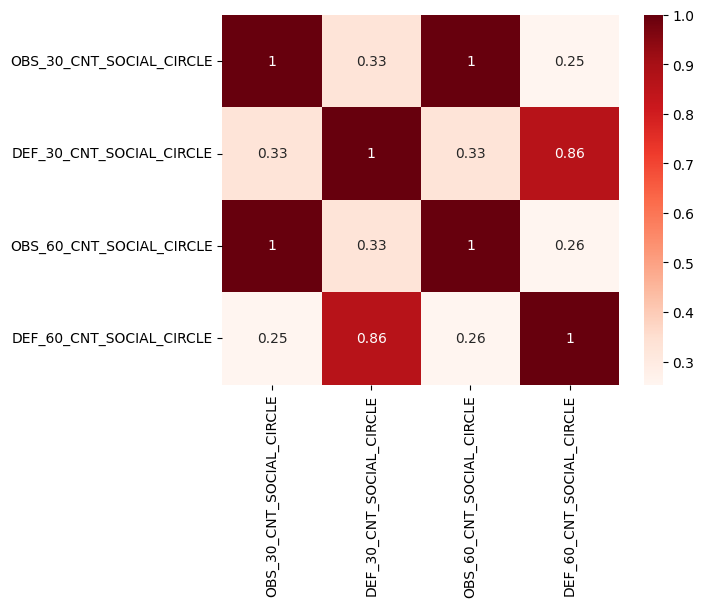

In [30]:
sns.heatmap(df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].corr() , annot = True , cmap = 'Reds') 


In this heatmap we have noticed that OBS_30_CNT_SOCIAL_CIRCLE ,  OBS_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE , DEF_60_CNT_SOCIAL_CIRCLE have very close corelation that's why we get same results throw both columns . 
Now we are going to drop the OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE 

In [31]:
df.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'] , axis = 1 , inplace = True) 

Now we have various columns related to documents but , we don't have document names but it gives results in the form of 1 and 0.
1 => document given , 0 => document not given. 
So we are going to add them and make it's new column that eho many of the document is given by the client out of 20 adding new column.

In [87]:
df.to_csv('Ready_to_analyze.csv')  

In [91]:
df['Total_documents_outof_20'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] 
+ df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10']
+ df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] 
+ df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21']  
df11 = pd.read_csv('Ready_to_analyze.csv') 
df11['Total_documents_of_outof_20'] = df.Total_documents_outof_20   

In [92]:
# dropping flag docs columns 
df.drop(['FLAG_DOCUMENT_2' , 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'] , axis = 1 , inplace = True)  
print("Dropped all the Flag_documents columns")     

Dropped all the Flag_documents columns


In [93]:
df.columns 

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_TO_YEAR_BIRTH',
       'DAYS_TO_YEAR_EMPLOYED', 'DAYS_TO_YEAR_REGISTRATION',
       'DAYS_TO_YEAR_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE_1',
       'Total_documents_outof_20'],
      dtype='object')

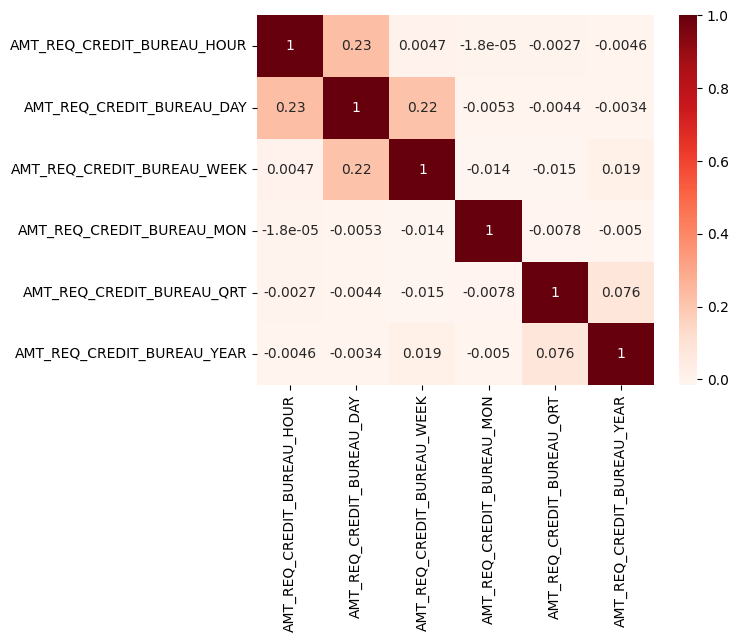

In [94]:
sns.heatmap(df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr() , annot = True , cmap = 'Reds') 
plt.show() 

We cannot rely on heatmap for dropping because it is showing us that they have not corelations . 
These columns are not related to each other but , we cannot get any information from equirying about client Hourly , Day wise , Weekly. 
We use Monthly , Quterly and Yearly column for enquiry basis   


In [95]:
df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'] , inplace = True , axis = 1) 
print("AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK columns are dropped")  

AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK columns are dropped


All the null values in place of the NAME_SUITE_TYPE filling with not known 

In [96]:
df.loc[df.NAME_TYPE_SUITE.isnull() , 'NAME_TYPE_SUITE'] = 'not known'   

I am putting 'not known' in occupational_type column where value is null 

In [97]:
df.loc[df.OCCUPATION_TYPE.isnull() , 'OCCUPATION_TYPE'] = 'not known'  
print("No Null values remained in column occupation_type" , df.OCCUPATION_TYPE.isnull().sum())  

No Null values remained in column occupation_type 0


There are some of the null values are still remaining in the columns but , we are not going to fill them or put anything because they are very less in number which will not affect out analysis for ex: AMT_ANNUITY have only 12 null values. 
Social circle which is OBS and DEF has null values but we cannot put mode in it . 

In [98]:
for i in df.columns:
    print(i , ": " , df[i].isnull().sum())  

TARGET :  0
NAME_CONTRACT_TYPE :  0
CODE_GENDER :  0
FLAG_OWN_CAR :  0
FLAG_OWN_REALTY :  0
CNT_CHILDREN :  0
AMT_INCOME_TOTAL :  0
AMT_CREDIT :  0
AMT_ANNUITY :  12
AMT_GOODS_PRICE :  0
NAME_TYPE_SUITE :  0
NAME_INCOME_TYPE :  0
NAME_EDUCATION_TYPE :  0
NAME_FAMILY_STATUS :  0
NAME_HOUSING_TYPE :  0
FLAG_MOBIL :  0
FLAG_CONT_MOBILE :  0
FLAG_PHONE :  0
FLAG_EMAIL :  0
OCCUPATION_TYPE :  0
CNT_FAM_MEMBERS :  2
REGION_RATING_CLIENT :  0
ORGANIZATION_TYPE :  0
OBS_60_CNT_SOCIAL_CIRCLE :  1021
DEF_60_CNT_SOCIAL_CIRCLE :  1021
AMT_REQ_CREDIT_BUREAU_MON :  41519
AMT_REQ_CREDIT_BUREAU_QRT :  41519
AMT_REQ_CREDIT_BUREAU_YEAR :  41519
DAYS_TO_YEAR_BIRTH :  0
DAYS_TO_YEAR_EMPLOYED :  0
DAYS_TO_YEAR_REGISTRATION :  0
DAYS_TO_YEAR_ID_PUBLISH :  0
DAYS_LAST_PHONE_CHANGE_1 :  1
Total_documents_outof_20 :  0


In [99]:
df.loc[df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull() , 'OBS_60_CNT_SOCIAL_CIRCLE'] = 0.0 

In [100]:
df.loc[df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull() , 'DEF_60_CNT_SOCIAL_CIRCLE'] = 0.0
print('No null values : ' , df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum() , df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()) 

No null values :  0 0


I put 0.0 because this value has maximum_counts in DEF_60_CNT_SOCIAL_CIRCLE  

In [101]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(ascending = False) 

DEF_60_CNT_SOCIAL_CIRCLE
0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64

I put 0.0 because this value has maximum_counts in OBS_60_CNT_SOCIAL_CIRCLE 

In [102]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(ascending = False)  

OBS_60_CNT_SOCIAL_CIRCLE
0.0      165687
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [103]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307511 non-null  float64
 10  NAME_TYPE_SUITE             307511 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

# Checking for the unique values

In [104]:
for i in df.columns:
    if df[i].dtype == 'O': 
        print(i , " : " , df[i].unique())

NAME_CONTRACT_TYPE  :  ['cash loans' 'revolving loans']
CODE_GENDER  :  ['m' 'f' 'xna']
FLAG_OWN_CAR  :  ['n' 'y']
FLAG_OWN_REALTY  :  ['y' 'n']
NAME_TYPE_SUITE  :  ['unaccompanied' 'family' 'others' 'not known' 'group of people']
NAME_INCOME_TYPE  :  ['working' 'state servant' 'commercial associate' 'pensioner' 'unemployed'
 'student' 'businessman' 'maternity leave']
NAME_EDUCATION_TYPE  :  ['secondary / secondary special' 'higher education' 'incomplete higher'
 'lower secondary' 'academic degree']
NAME_FAMILY_STATUS  :  ['single / not married' 'married' 'civil marriage' 'widow' 'separated'
 'unknown']
NAME_HOUSING_TYPE  :  ['house / apartment' 'rented apartment' 'with parents'
 'municipal apartment' 'office apartment' 'co-op apartment']
OCCUPATION_TYPE  :  ['laborers' 'core staff' 'accountants' 'managers' 'not known' 'drivers'
 'sales staff' 'cleaning staff' 'cooking staff' 'private service staff'
 'medicine staff' 'security staff' 'high skill tech staff'
 'waiters/barmen staff' 'low

In [105]:
# Making all the object type values in lower case 
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = df[i].str.lower() 


In NAME_TYPE_SUITE we are putting 'others' in place of 'other_a' and 'other_b'. 
In NAME_TYPE_SUITE we are putting 'family' in place of 'spouse / patner' and 'children'  

In [106]:
df.loc[df['NAME_TYPE_SUITE'] == 'other_a' , 'NAME_TYPE_SUITE'] = 'others' 

In [107]:
df.loc[df['NAME_TYPE_SUITE'] == 'other_b' , 'NAME_TYPE_SUITE'] = 'others'  

In [108]:
df.loc[df['NAME_TYPE_SUITE'] == 'spouse, partner' , 'NAME_TYPE_SUITE'] = 'family' 
df.loc[df['NAME_TYPE_SUITE'] == 'children' , 'NAME_TYPE_SUITE'] = 'family'  

In [109]:
for i in df.columns:
    if df[i].dtype == 'int64':
        print(i , " : " , df[i].unique()) 

TARGET  :  [1 0]
CNT_CHILDREN  :  [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
FLAG_MOBIL  :  [1 0]
FLAG_CONT_MOBILE  :  [1 0]
FLAG_PHONE  :  [1 0]
FLAG_EMAIL  :  [0 1]
REGION_RATING_CLIENT  :  [2 1 3]
DAYS_TO_YEAR_BIRTH  :  [26 46 53 55 47 38 52 56 40 28 37 39 24 36 27 49 32 51 41 31 69 44 29 42
 33 34 48 58 66 45 65 22 60 50 57 63 54 43 30 68 64 62 59 61 35 23 25 67
 70 21]
DAYS_TO_YEAR_EMPLOYED  :  [   2    4    1    9    5 1000    6    8   22   12    3   10   13   15
   27   20    7   11   14   25   19   24   16   23   28   33   21   26
   43   17   31   39   34   18   32   29   30   37   35   41   40   36
   38   42   45   44    0   49   47   46   48   50]
DAYS_TO_YEAR_ID_PUBLISH  :  [ 6  1  7 10  2 11  3  9 14  4  5  8 13 12 15 17 16 18  0 20]
Total_documents_outof_20  :  [1 0]


In [110]:
df["TARGET"].dtype 

dtype('int64')

We cannot say categorical variables outliers and the int dtype values which are present in it also have some outliers but they can be also treted as categorical values because here they are very limited that's why I am not going to change those values 

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


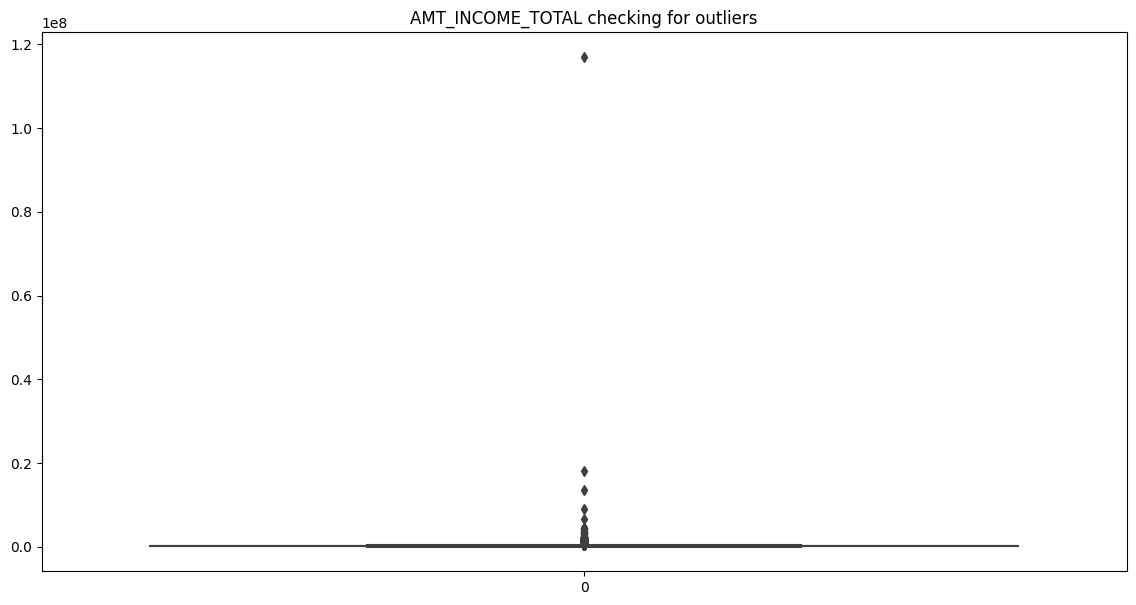

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


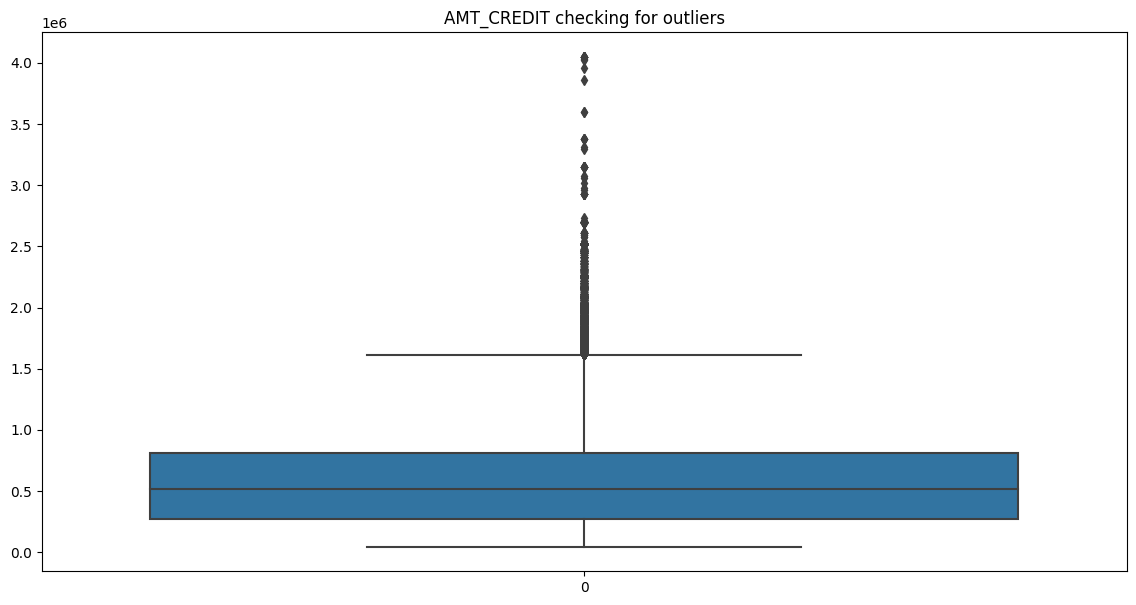

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


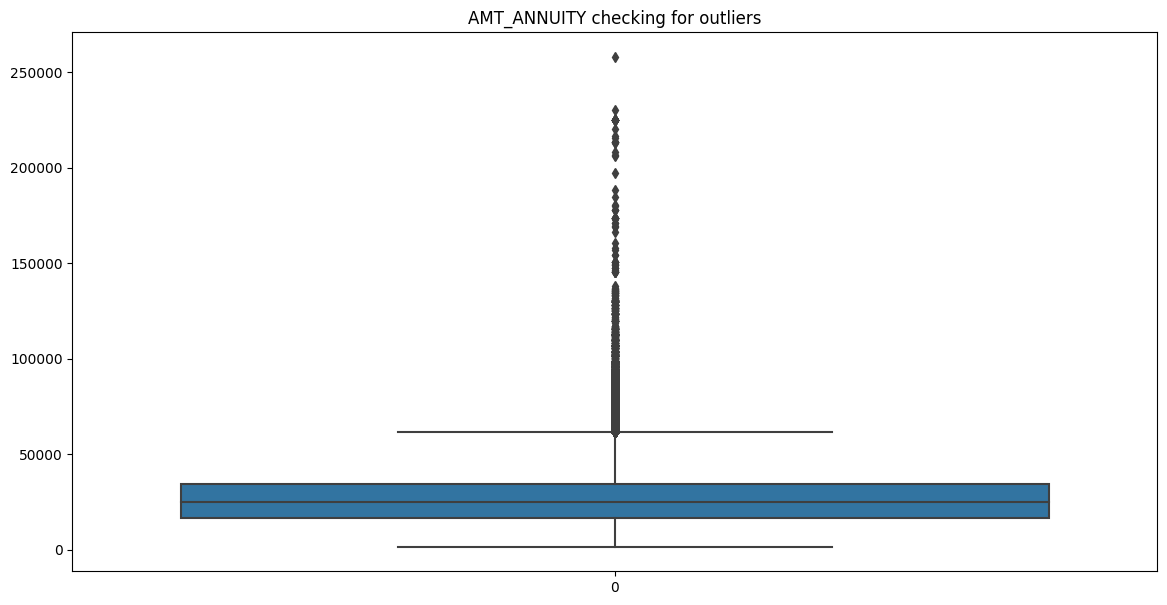

count    3.075110e+05
mean     5.379095e+05
std      3.696338e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


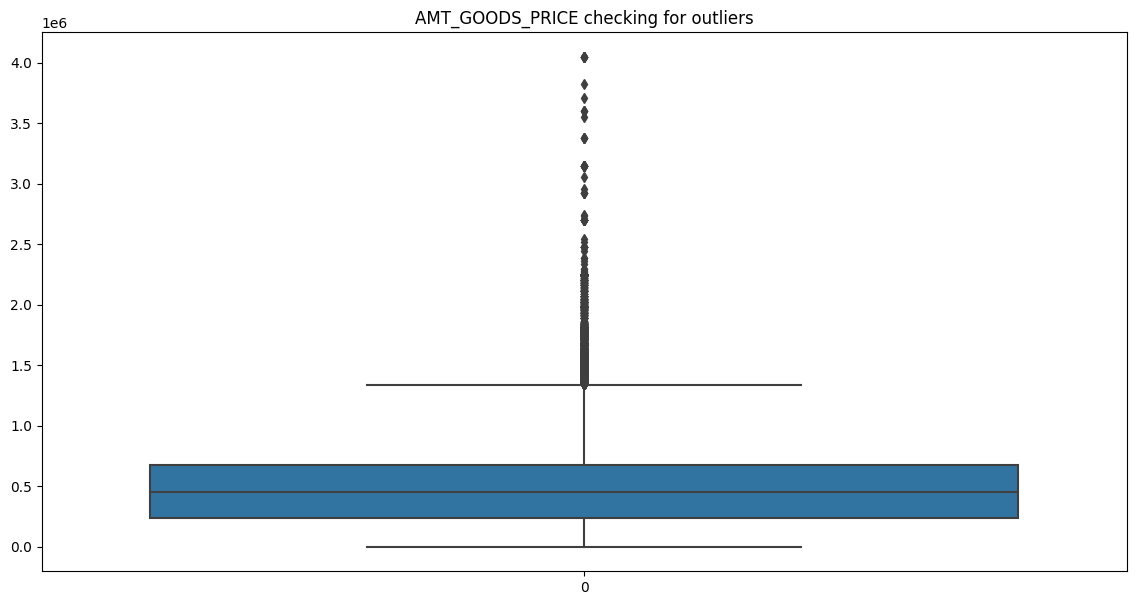

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


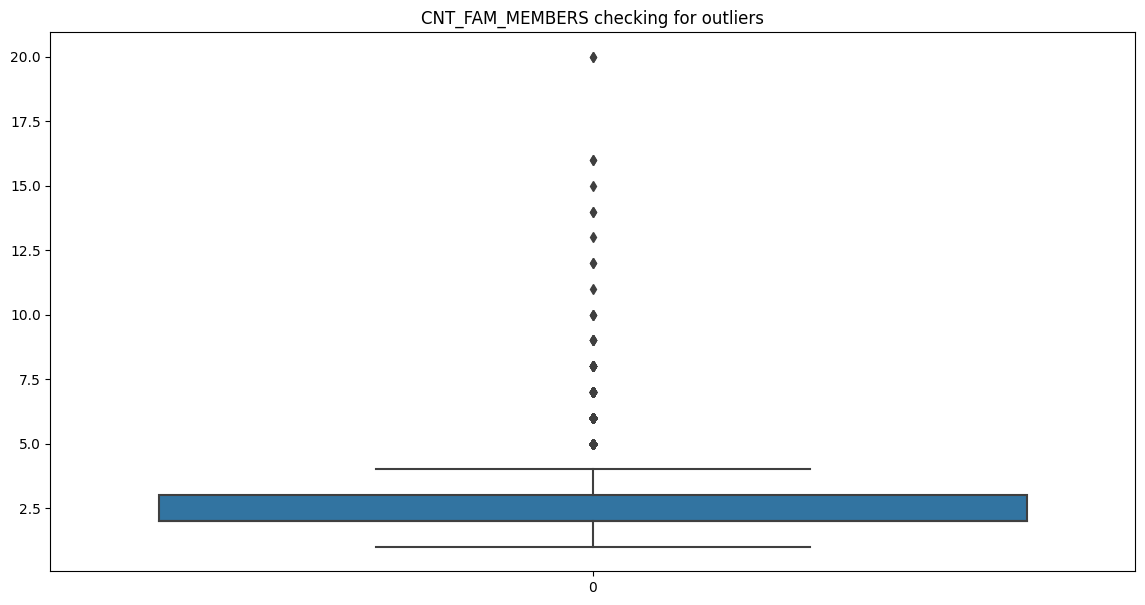

count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


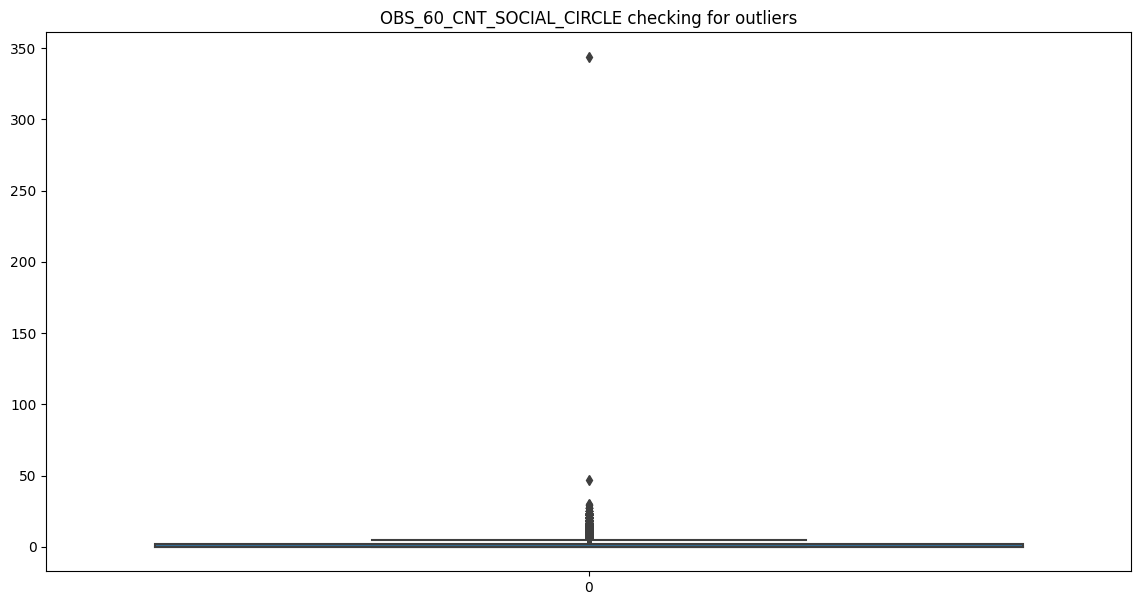

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


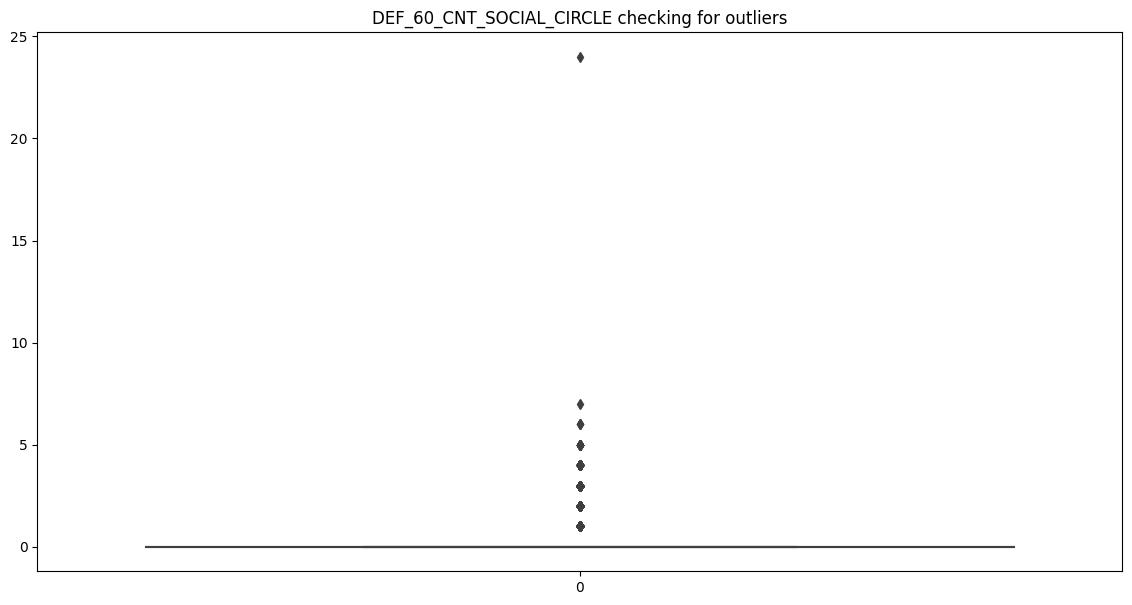

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


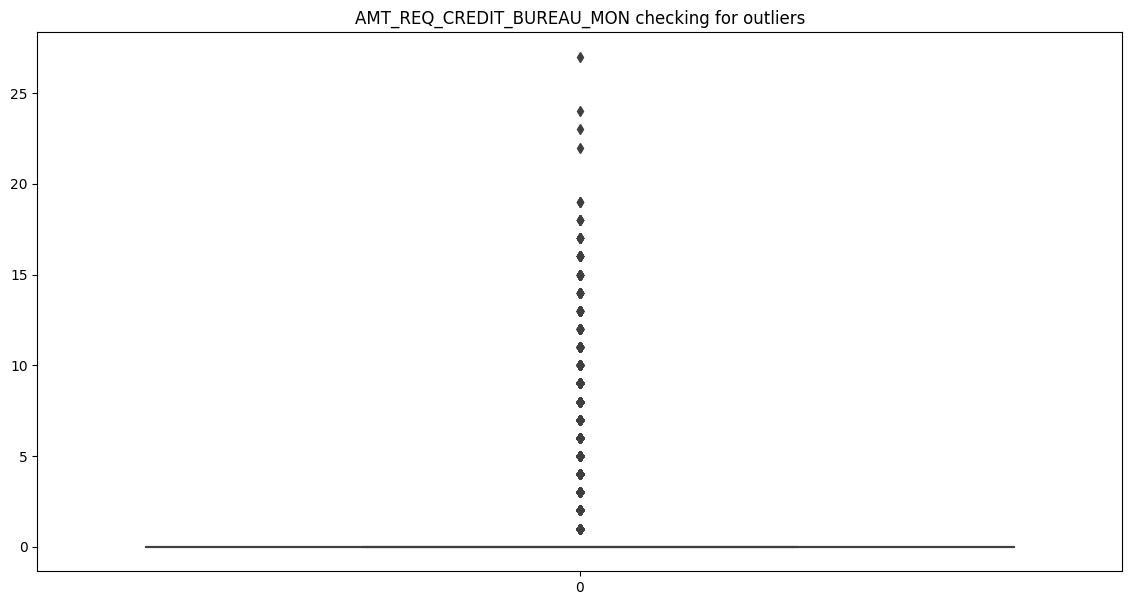

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


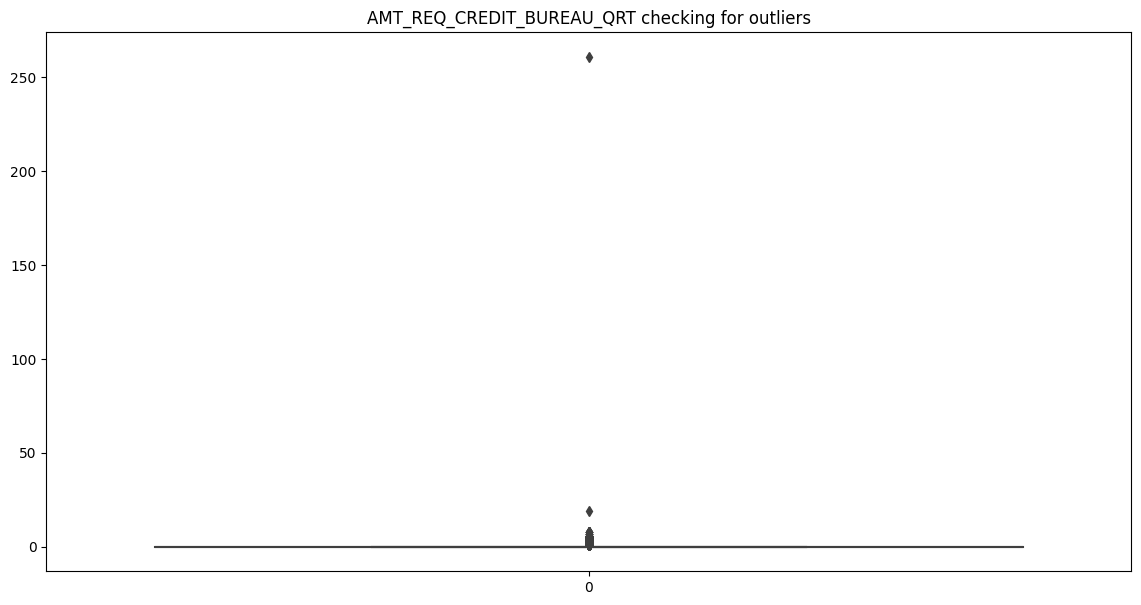

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


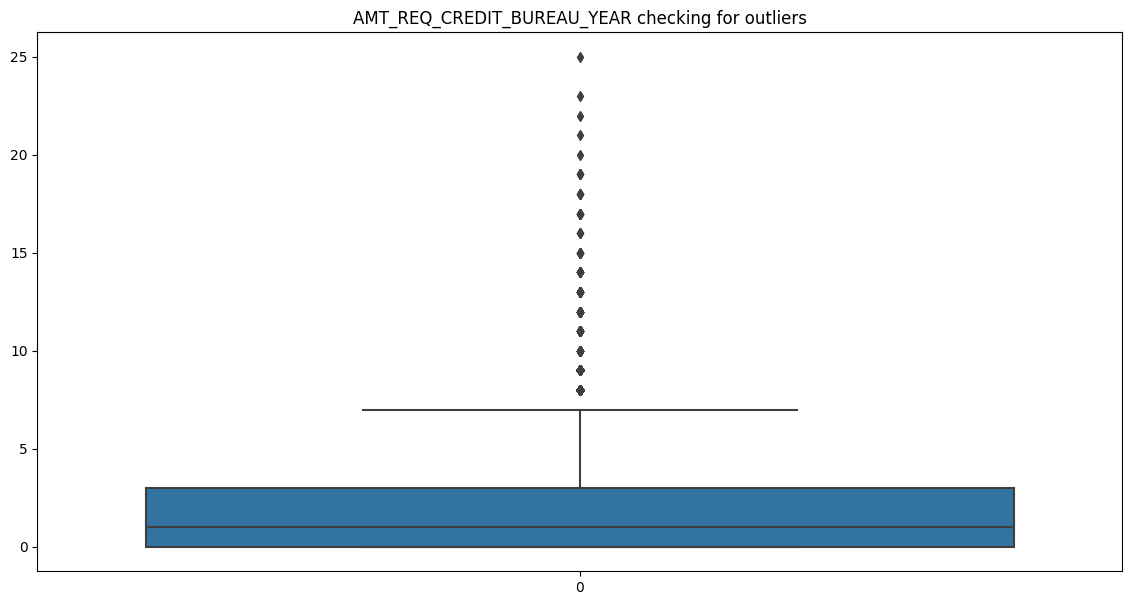

count    307511.000000
mean         14.165721
std           9.647134
min           0.000000
25%           6.000000
50%          13.000000
75%          21.000000
max          68.000000
Name: DAYS_TO_YEAR_REGISTRATION, dtype: float64


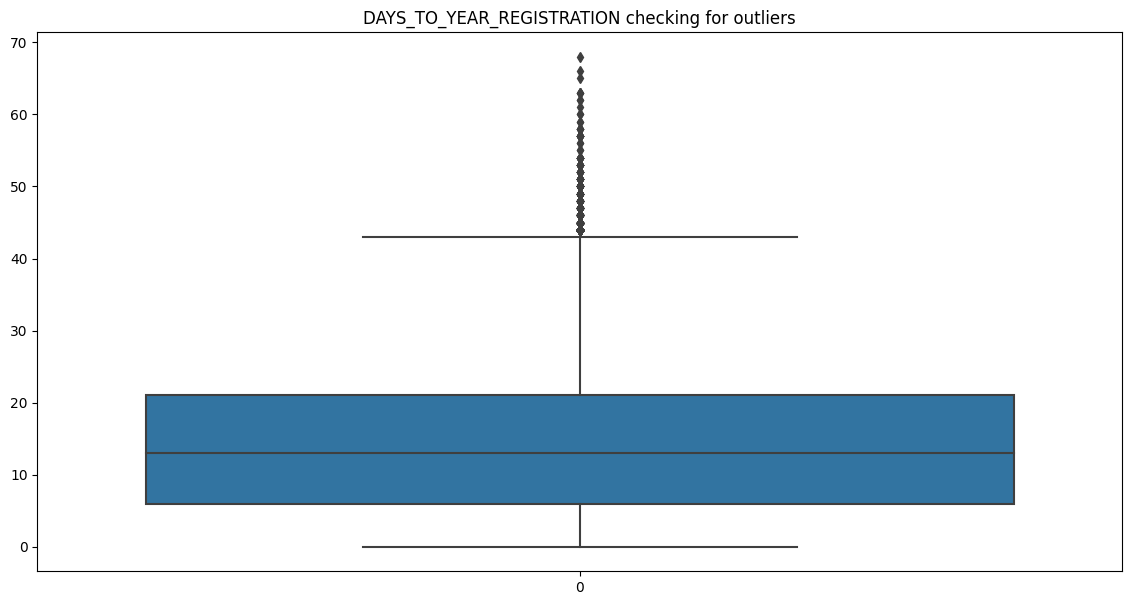

count    307510.000000
mean          3.100390
std           2.337107
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          12.000000
Name: DAYS_LAST_PHONE_CHANGE_1, dtype: float64


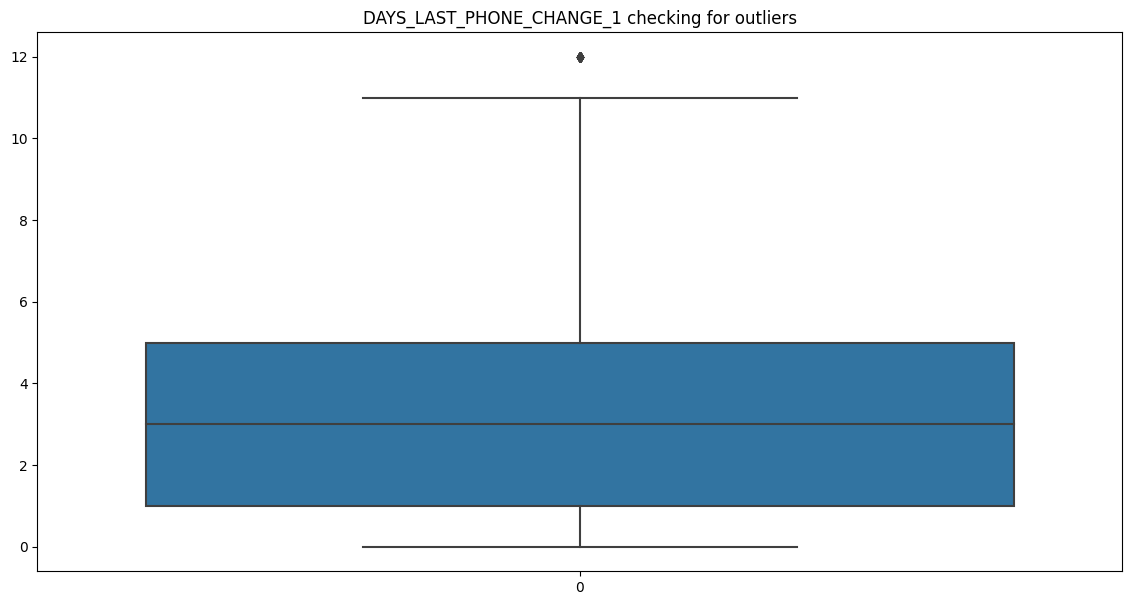

In [111]:
for i in df.columns:
    if df[i].dtype == 'float64': 
        print(df[i].describe())  
        plt.figure(figsize = [14 , 7]) 
        plt.title(f'{i} checking for outliers') 
        sns.boxplot(df[i]) 
        plt.show()    

I want to go ahead with outliers 

# Our Target variable to check defaulters is the TARGET variable of the data 

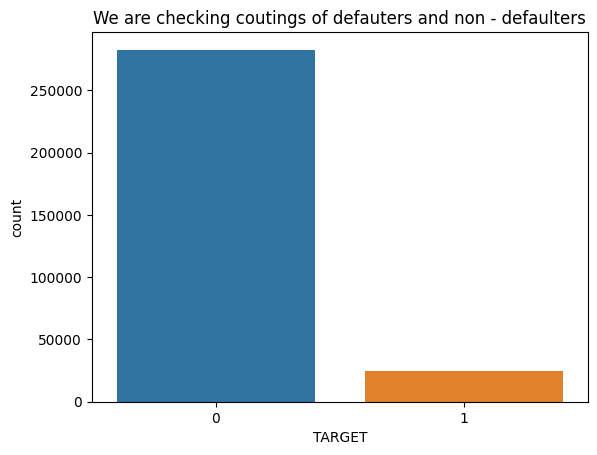

In [112]:
plt.title('We are checking coutings of defauters and non - defaulters') 
sns.countplot(x = df['TARGET'])  
plt.show()

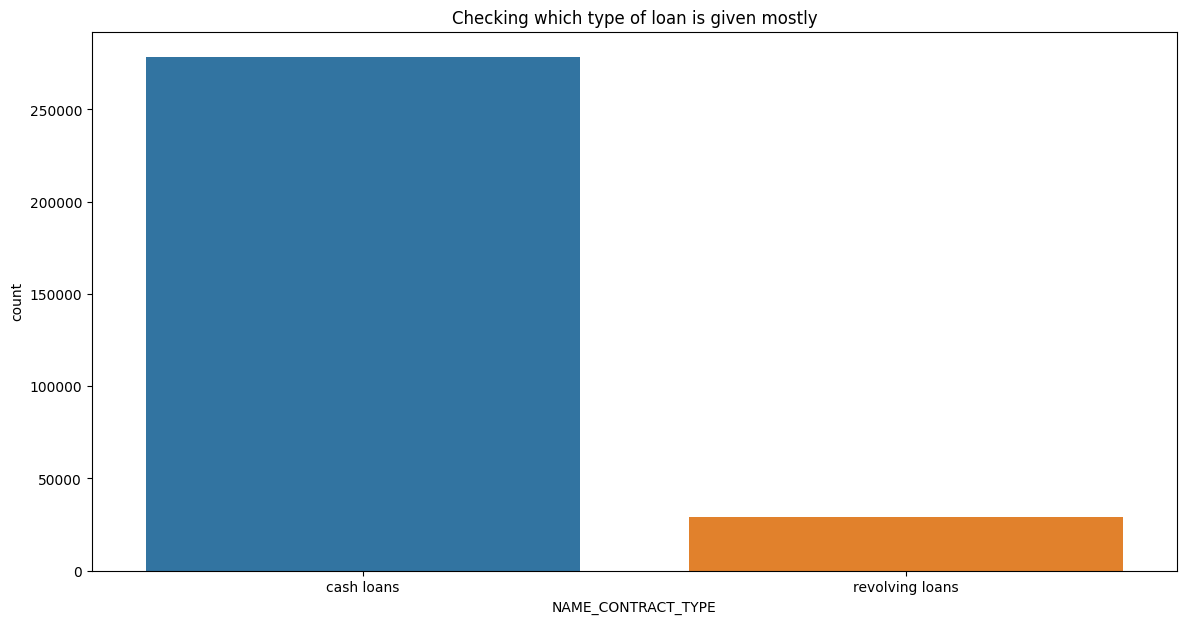

In [113]:
plt.figure(figsize = [14 , 7])
sns.countplot(x = df['NAME_CONTRACT_TYPE']) 
plt.title("Checking which type of loan is given mostly") 
plt.show()  

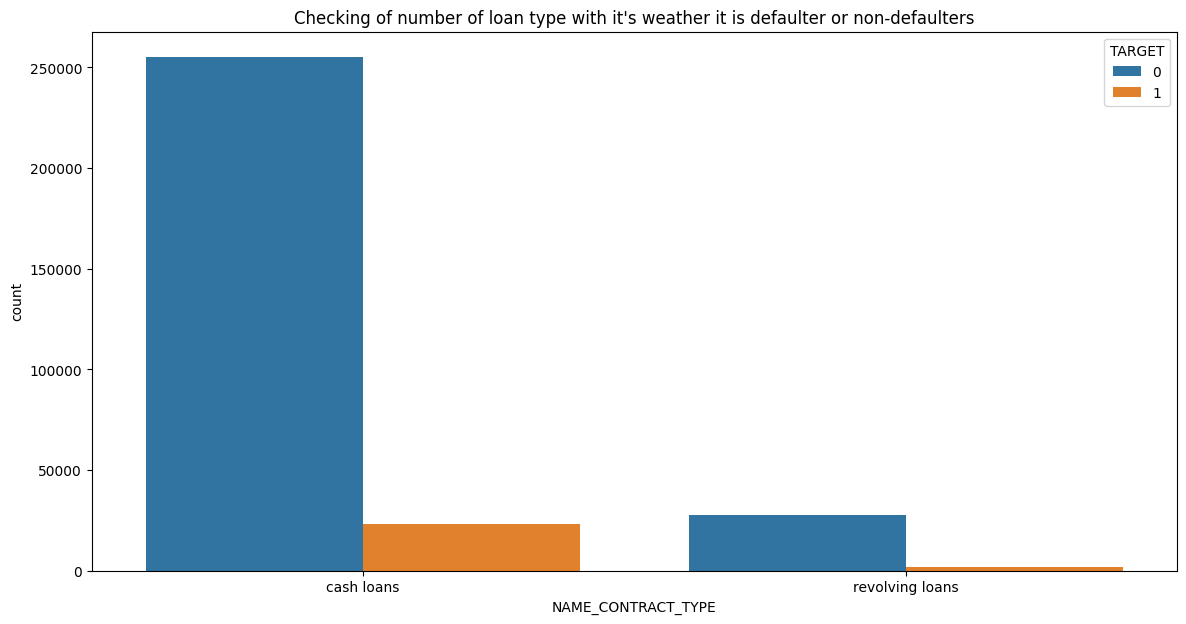

In [114]:
plt.figure(figsize = [14 , 7]) 
sns.countplot(x = df['NAME_CONTRACT_TYPE'] , hue = df['TARGET'])  
plt.title("Checking of number of loan type with it's weather it is defaulter or non-defaulters")
plt.show() 

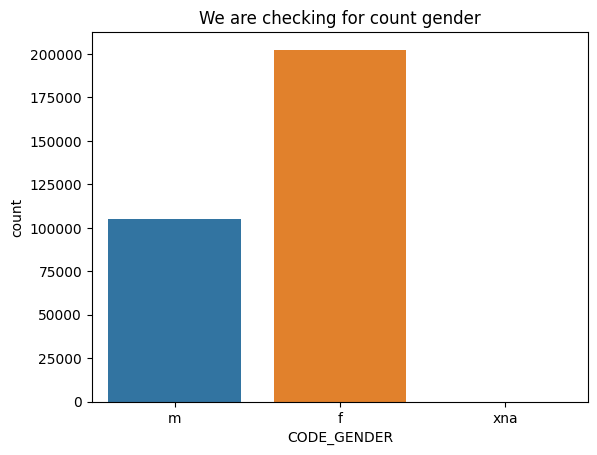

In [115]:
sns.countplot(x = df['CODE_GENDER']) 
plt.title("We are checking for count gender") 
plt.show()

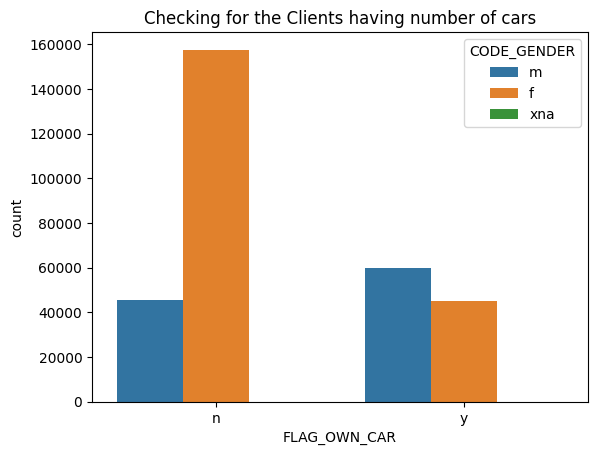

In [116]:
sns.countplot(x = df['FLAG_OWN_CAR'] , hue = df['CODE_GENDER'])  
plt.title('Checking for the Clients having number of cars') 
plt.show()

* In FLAG_OWN_CAR clients having lowest number of cars  
* In FLAG_OWN_CAR Number of females have less owner of cars  
* This is also a big reason that females are getting more loans compare to mens 

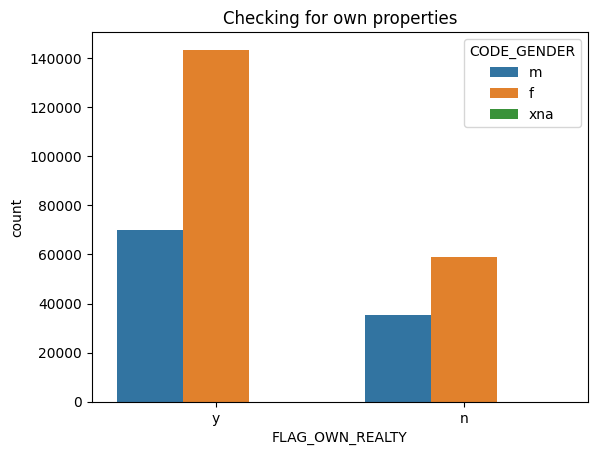

In [117]:
sns.countplot(x = df['FLAG_OWN_REALTY'] ,  hue = df['CODE_GENDER'] ) 
plt.title("Checking for own properties")
plt.show()

* In this bar graph we have observed that female clients have most number of properties and their success , banks are preferring to give the loans to those who have their own properties

In [118]:
df.groupby(['CODE_GENDER' ,  'FLAG_OWN_REALTY'])['FLAG_OWN_REALTY'].count() / len(df) * 100

CODE_GENDER  FLAG_OWN_REALTY
f            n                  19.197037
             y                  46.637356
m            n                  11.435688
             y                  22.728618
xna          y                   0.001301
Name: FLAG_OWN_REALTY, dtype: float64

In [119]:
df.groupby(['CODE_GENDER' , 'FLAG_OWN_CAR'])['FLAG_OWN_CAR'].count() / len(df) * 100

CODE_GENDER  FLAG_OWN_CAR
f            n               51.214103
             y               14.620290
m            n               14.774431
             y               19.389875
xna          n                0.000650
             y                0.000650
Name: FLAG_OWN_CAR, dtype: float64

In this stastical data we are oberving that females having more number of properties but , less number of cars 

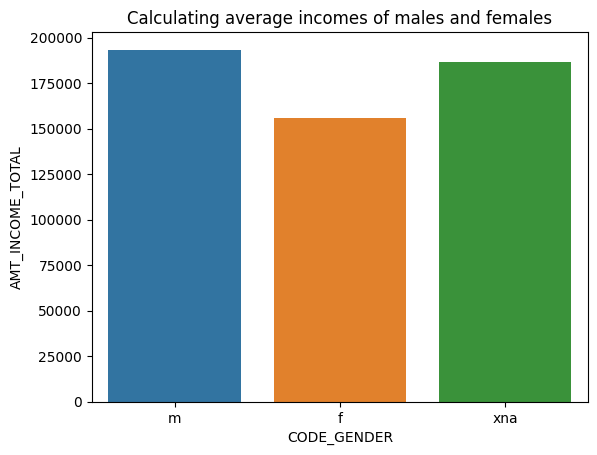

In [120]:
sns.barplot(x = df['CODE_GENDER'] , y = df['AMT_INCOME_TOTAL']  , errorbar = ('ci' , False) ) 
plt.title("Calculating average incomes of males and females")
plt.show()

In [121]:
df.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].mean()

CODE_GENDER
f      156032.309247
m      193396.482153
xna    186750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [122]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
f      202448
m      105059
xna         4
Name: count, dtype: int64

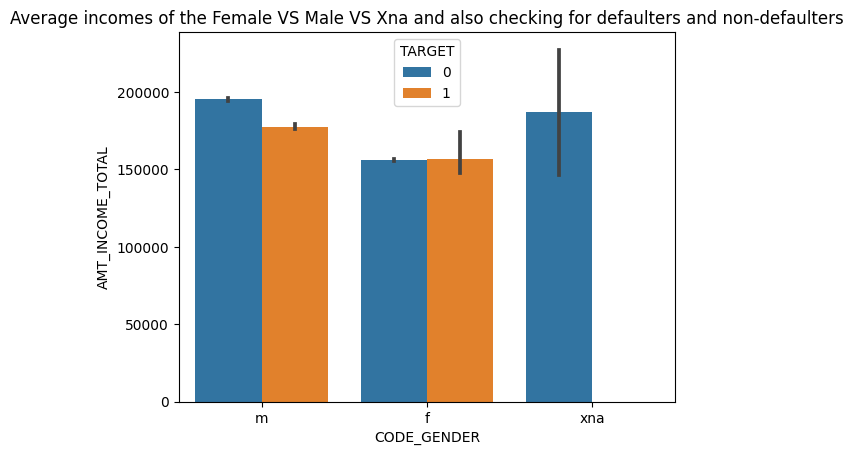

In [123]:
sns.barplot(x = df['CODE_GENDER'] , y = df['AMT_INCOME_TOTAL'] , hue = df['TARGET']) 
plt.title("Average incomes of the Female VS Male VS Xna and also checking for defaulters and non-defaulters") 
plt.show() 

In [124]:
df.groupby(['TARGET','CODE_GENDER'])['TARGET'].count() / len(df) * 100

TARGET  CODE_GENDER
0       f              61.226428
        m              30.699390
        xna             0.001301
1       f               4.607965
        m               3.464917
Name: TARGET, dtype: float64

We only come to know that females get bulk number of loans average salary of male is higher one intresting thing come to know that xna Income is have better average but only 4 clients are of that code_gender that's we can't conclude that xna are not defaulters. 

# Females have highest non-defaulters rate about 61% of females are non-defaulter , Cash Loan is more preferable than revolving loans . 

In [125]:
df['AMT_CREDIT'].unique()

array([ 406597.5, 1293502.5,  135000. , ...,  181989. ,  743863.5,
       1391130. ])

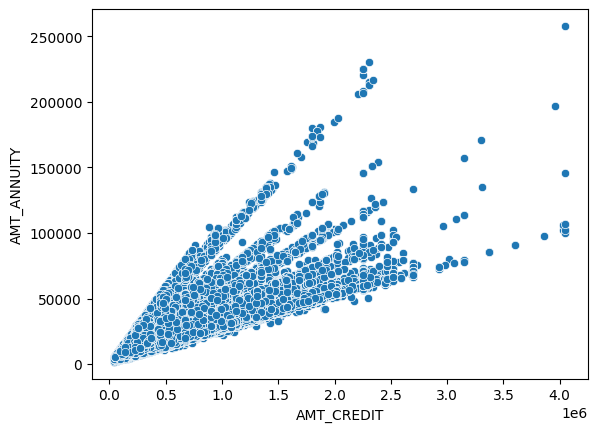

In [126]:
sns.scatterplot(x = df['AMT_CREDIT'] , y = df['AMT_ANNUITY']) 
plt.show() 

In this scatterplot we see that as the amount credit of client is increasing the amount annuity is also increasing.

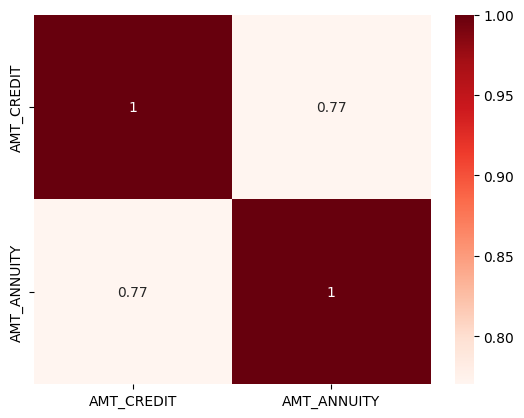

In [127]:
sns.heatmap(df[['AMT_CREDIT','AMT_ANNUITY']].corr() , annot = True , cmap = 'Reds') 
plt.show()

They are highly related to each other as we can as bank know the capacity of the client from it he is capable to pay the loan of amount as he is investing it into the bank per month . 


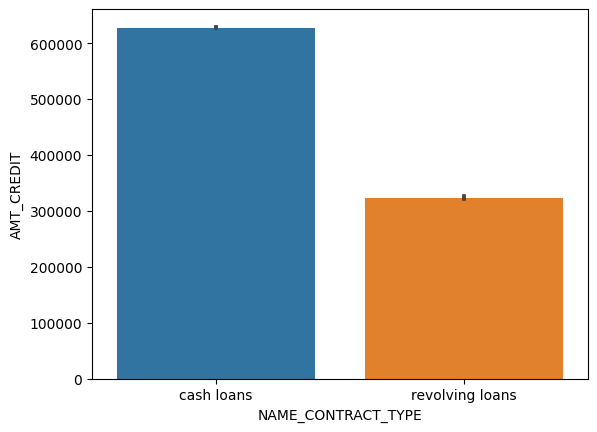

In [128]:
sns.barplot( x = df['NAME_CONTRACT_TYPE'] , y = df['AMT_CREDIT'] )  
plt.show()

Here cash loans are most preferabble contract type proved again .

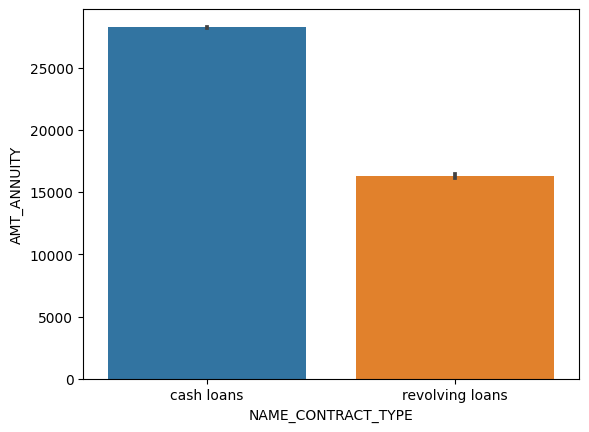

In [129]:
sns.barplot( x = df['NAME_CONTRACT_TYPE'] , y = df['AMT_ANNUITY'] )  
plt.show()

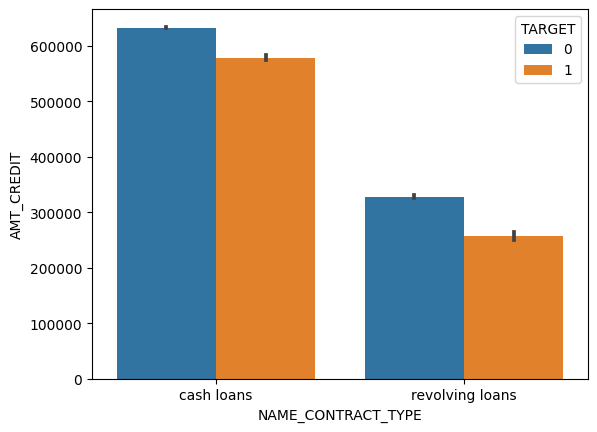

In [130]:
sns.barplot( x = df['NAME_CONTRACT_TYPE'] , y = df['AMT_CREDIT'] , hue = df['TARGET'] )  
plt.show()

Risk is involved in both the type of contract types as we see here 

In [131]:
df['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

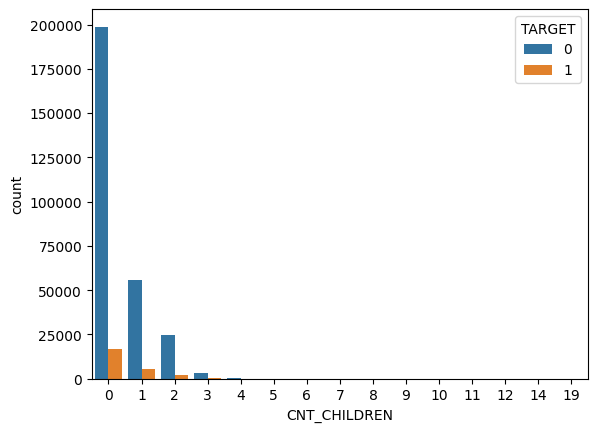

In [132]:
sns.countplot(x = df['CNT_CHILDREN'] , hue = df['TARGET']) 
plt.show()

In [133]:
df['CNT_CHILDREN'].value_counts()  / len(df)  * 100

CNT_CHILDREN
0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: count, dtype: float64

In this bargraph we observe that most number of loans provided to those clients who's child are less than 4 . 

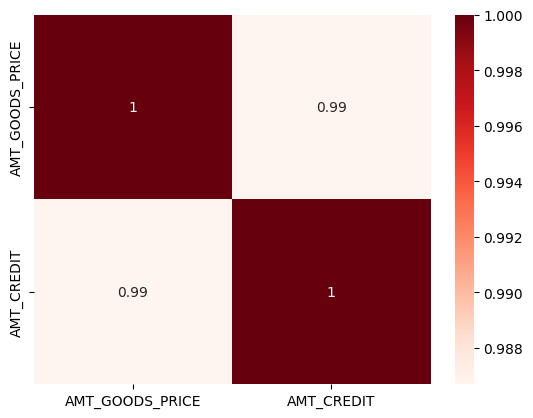

In [134]:
sns.heatmap(df[['AMT_GOODS_PRICE' , 'AMT_CREDIT']].corr() , annot = True , cmap = "Reds") 
plt.show()

* Amount of goods is correlated to the amount of credit it means loan is only provided on the basis of if client will 
 will give proper information about the goods for which he is going to take loan

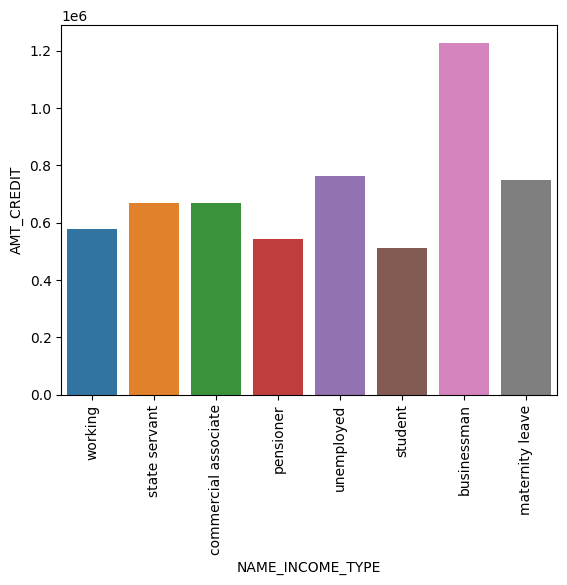

In [135]:
sns.barplot(x = df['NAME_INCOME_TYPE'] , y = df['AMT_CREDIT'] , errorbar = ('ci' , False)) 
plt.xticks(rotation = 90)
plt.show()

Highest Number of loans given to Bussiness mens as they have their investements at various places and having higher income rates.

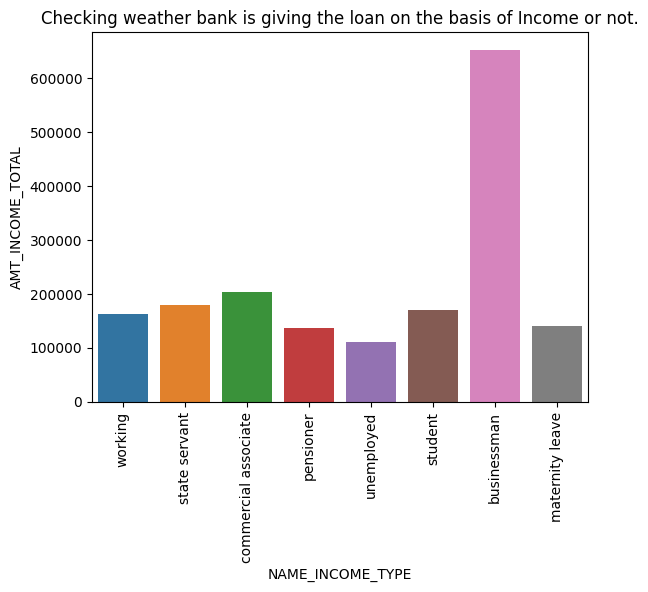

In [136]:
sns.barplot( x = df['NAME_INCOME_TYPE'] , y = df['AMT_INCOME_TOTAL'] , errorbar = ('ci' , False))  
plt.xticks(rotation = 90) 
plt.title("Checking weather bank is giving the loan on the basis of Income or not.")
plt.show()  

# In this Bargraphs we have observe that Bussinessman has highest amount of incomes  , banks also provide them maximum loans Unemployed and maternity leave people have getting more bank loans

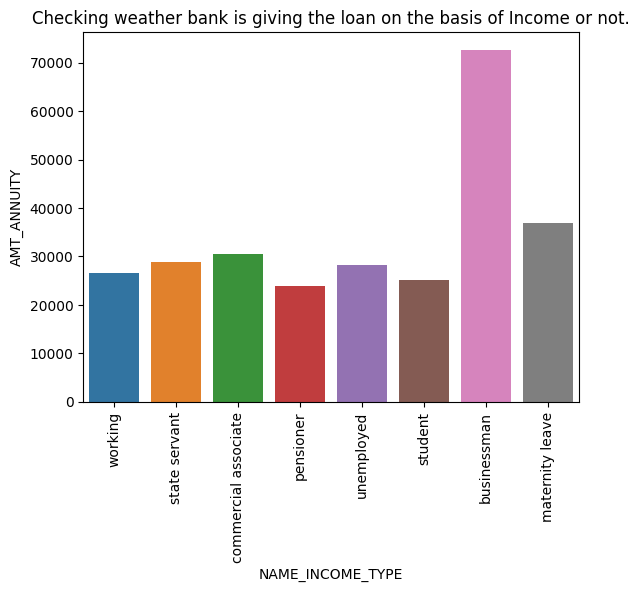

In [137]:
sns.barplot( x = df['NAME_INCOME_TYPE'] , y = df['AMT_ANNUITY'] , errorbar = ('ci' , False))  
plt.xticks(rotation = 90) 
plt.title("Checking weather bank is giving the loan on the basis of Income or not.")
plt.show()  

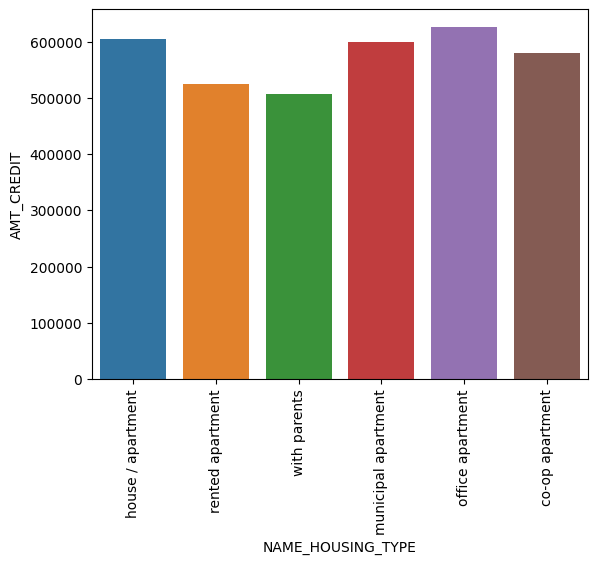

In [138]:
sns.barplot(x = df['NAME_HOUSING_TYPE'] , y = df['AMT_CREDIT'] , errorbar = ('ci' , False))  
plt.xticks(rotation = 90)
plt.show()

We come to know that NAME_HOUSING_TYPE is not key factor to decide to give loan or not 

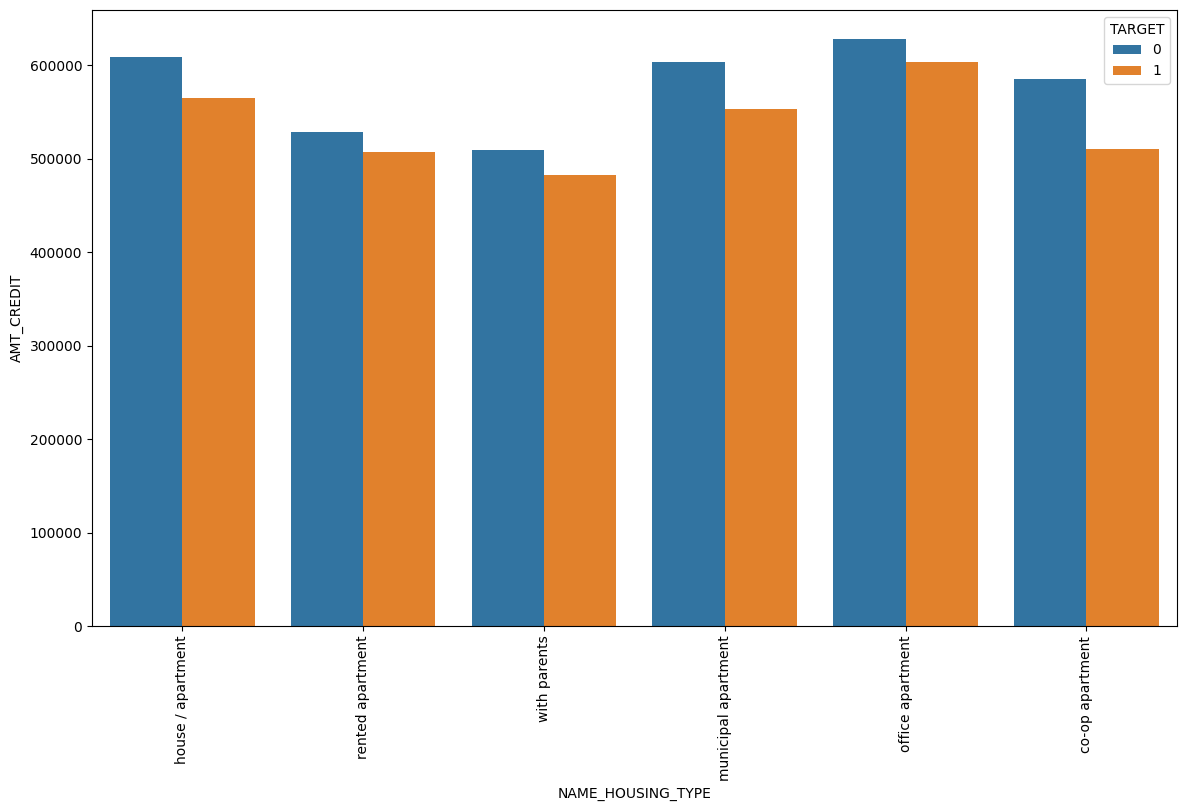

In [139]:
plt.figure(figsize = [14 , 8])
sns.barplot(x = df['NAME_HOUSING_TYPE'] , y = df['AMT_CREDIT']  , hue = df['TARGET'], errorbar = ('ci' , False))  
plt.xticks(rotation = 90)
plt.show()

From this graph it is more clear that NAME_HOUSING_TYPE is not key factor it has equal amount of loans given to all housing types.

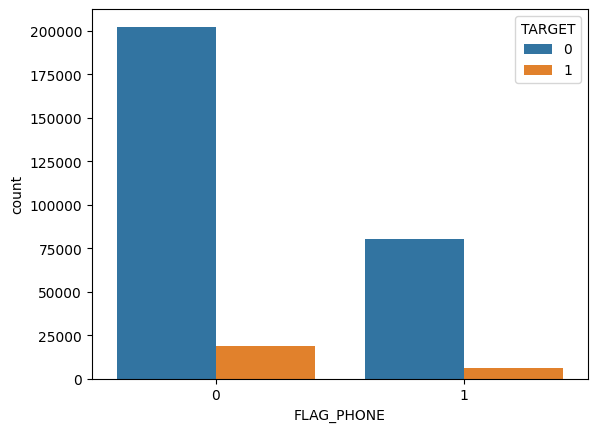

In [140]:
sns.countplot(x = df['FLAG_PHONE'] , hue = df['TARGET']) 
plt.show() 

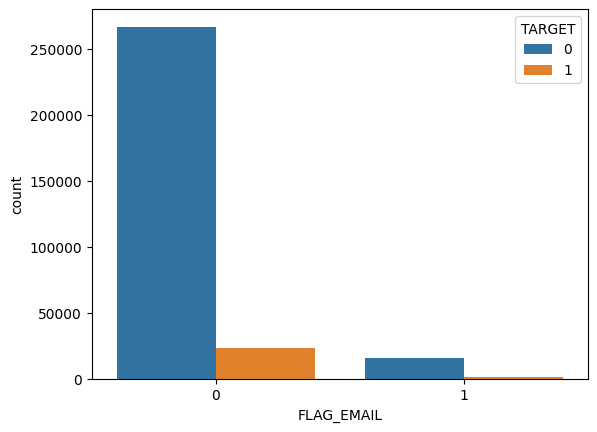

In [141]:
sns.countplot(x = df['FLAG_EMAIL'] , hue = df['TARGET']) 
plt.show() 

It is  email and contact number is not deciding factor here most number of clients have not given their contact information but , they have are non_defaulters

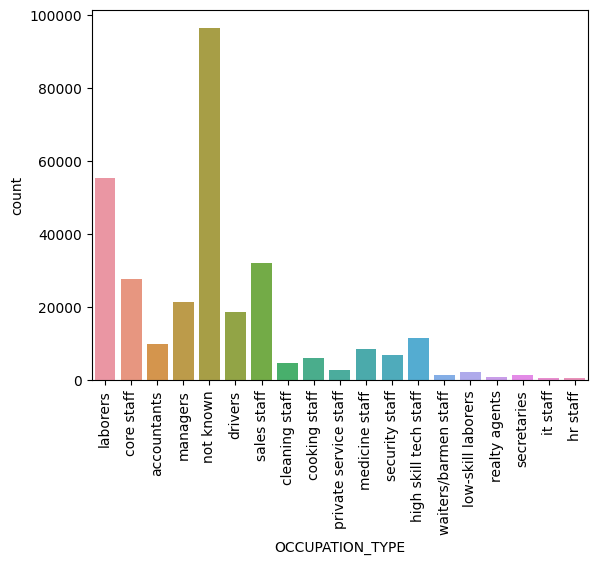

In [142]:
sns.countplot(x = df['OCCUPATION_TYPE'])  
plt.xticks(rotation = 90)
plt.show()

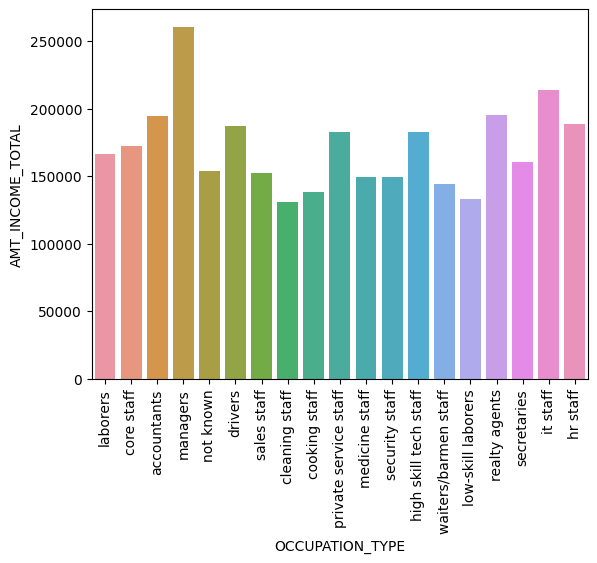

In [143]:
sns.barplot(x = df['OCCUPATION_TYPE'] , y = df['AMT_INCOME_TOTAL']  , errorbar = ('ci' , False))  
plt.xticks(rotation = 90)
plt.show()

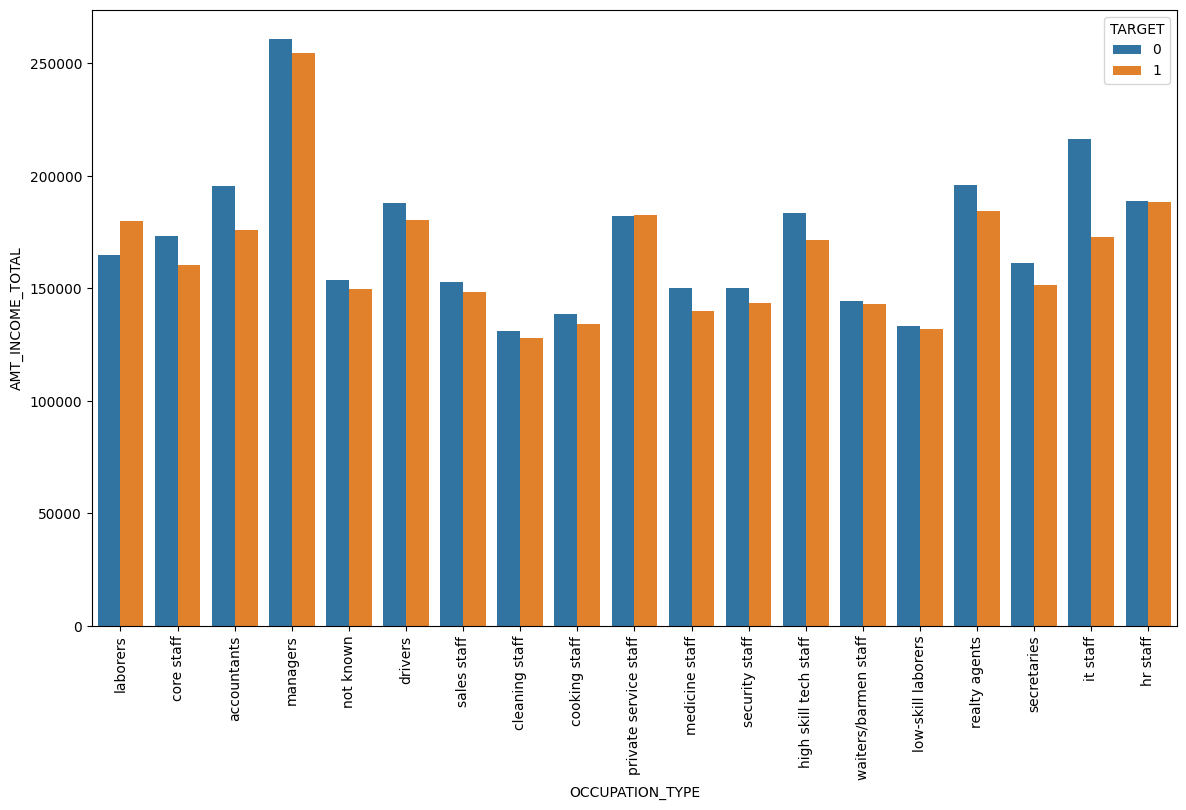

In [144]:
plt.figure(figsize = [14 , 8])
sns.barplot(x = df['OCCUPATION_TYPE'] , y = df['AMT_INCOME_TOTAL']  , hue = df['TARGET'] , errorbar = ('ci' , False))  
plt.xticks(rotation = 90)
plt.show()

We observe that here managers have highest average of getting loans because their income is higher , on the other hand the maximum number of loans given to the labour class. 

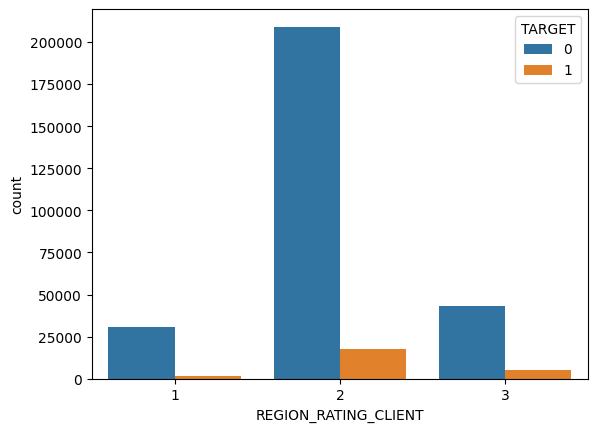

In [145]:
sns.countplot(x = df['REGION_RATING_CLIENT']  , hue = df['TARGET'] ) 
plt.show()

In [146]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
0.0      165687
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [147]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64

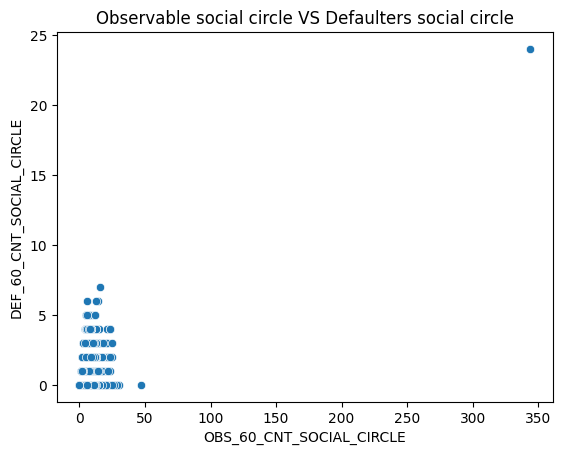

In [148]:
sns.scatterplot(x = df['OBS_60_CNT_SOCIAL_CIRCLE'] , y = df['DEF_60_CNT_SOCIAL_CIRCLE'])  
plt.title('Observable social circle VS Defaulters social circle')
plt.show()

In [150]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_TO_YEAR_BIRTH', 'DAYS_TO_YEAR_EMPLOYED',
       'DAYS_TO_YEAR_REGISTRATION', 'DAYS_TO_YEAR_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE_1', 'Total_documents_outof_20'],
      dtype='object')

In [151]:
df['DAYS_LAST_PHONE_CHANGE_1'] = abs(df['DAYS_LAST_PHONE_CHANGE_1'] // 365)

Here we have dropped the DAYS_LAST_PHONE_CHANGE column and added DAYS_LAST_PHONE_CHANGE_1 by converting it into positive and it is in days so converting days to year

In [153]:
df['DAYS_LAST_PHONE_CHANGE_1'].unique()

array([ 0., nan])

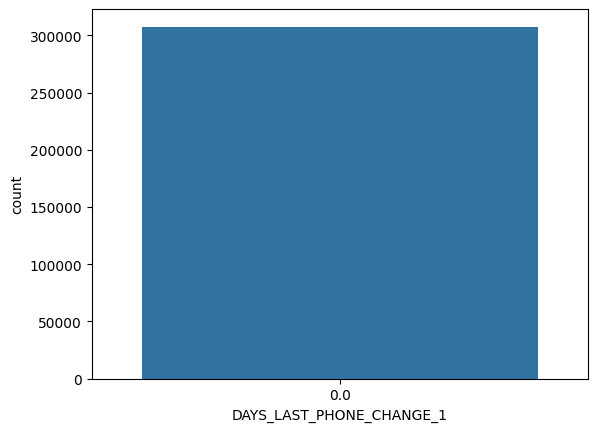

In [154]:
sns.countplot(x = df['DAYS_LAST_PHONE_CHANGE_1']) 
plt.show()

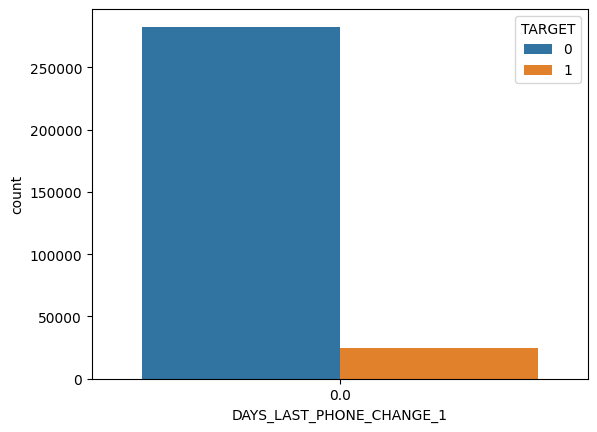

In [155]:
sns.countplot(x = df['DAYS_LAST_PHONE_CHANGE_1'] , hue = df['TARGET']) 
plt.show()

It is not showing me any fruitful info bacause count of clients who have changed their phone are highest  one and two year but, they are non - defaulters

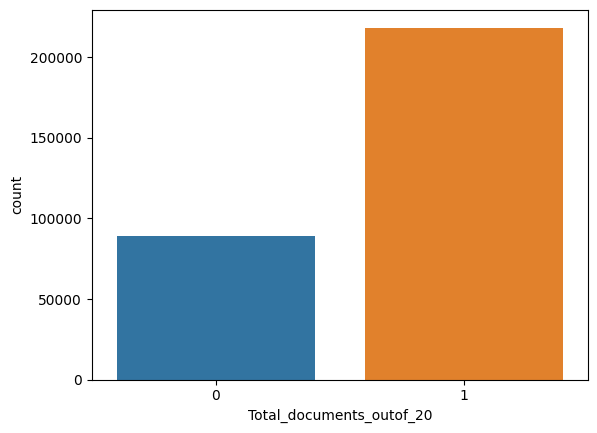

In [158]:
sns.countplot(x = df['Total_documents_outof_20']) 
plt.show()

In [157]:
# 1 document is given by maximum number of the clients here . 

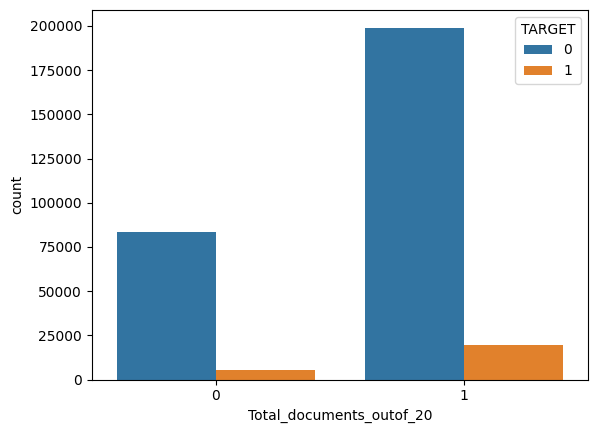

In [160]:
sns.countplot(x = df['Total_documents_outof_20'] , hue = df['TARGET']) 
plt.show()

# CONCLUSION 

1. We observed that the data of the non-defaulters client is about 91% and defaulters data is about 8% 
2. Cash loans is good to provide 
3. Female clients are more than Male clients bank give them loans immediately. 
4. Bussiness occupation type of clients get loans very quickly . 
5. As more Annual Annuity , the  more annual credit you get. 
6. Managers get the loans easily . 
7. If number of children is less than 3 , then bank will provide loan easily. 

# THANKS